# excercise 2: PCA + Multinomial Logistic Regression

## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import mutual_info_score

## Importing the dataset

In [32]:

#Load data and assign a name to features
features = ["F"+str(x) for x in range(1,11,1)]
dataset: pd.DataFrame = pd.read_csv("data_kPCA.txt", sep = " ", 
                                header = None, 
                                names  = features, 
                                index_col = False)

labels: pd.DataFrame = pd.read_csv("labels_kPCA.txt",  
                                header = None, 
                                names  = ["labels"], 
                                index_col = False)
dataset["labels"] = labels["labels"]

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Kernel PCA

In [35]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


## Logistic Regression

### [PC1,PC2] Training the Logistic Regression model on the Training set

In [36]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### [PC1,PC2] Predicting the Test set results

In [37]:
#prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [2 2]]


### [PC1,PC2] Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.9


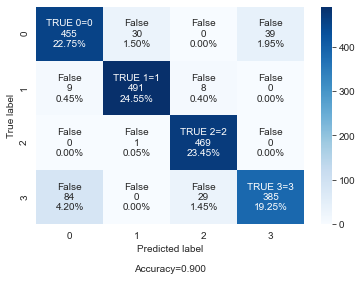

In [39]:
#display matrix
group_names = ["TRUE 0=0","False","False","False", 
          "False","TRUE 1=1","False","False", 
          "False","False","TRUE 2=2","False", 
          "False","False","False","TRUE 3=3"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

#if it is a binary confusion matrix, show some more stats
if len(cf_matrix)==2:
    #Metrics for Binary Confusion Matrices
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
else:
    stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues' )
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)
plt.show()
    
#TODO improve as per 
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://github.com/DTrimarchi10/confusion_matrix

# For an increasing number of PCs ...

In [42]:
accuracy_list=[]
mutual_info_list=[]

for pc in range(1,11,1):
    

    classifier.fit(X_train[:,:pc], y_train)
    y_pred = classifier.predict(X_test[:,:pc])
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    mi=mutual_info_score(y_test, y_pred)
    
    mutual_info_list.append(mi)
    print(f'PC 1 to PC{pc}     Accuracy score: {accuracy}   Mutual Information: {mi}')
    
   

PC 1 to PC1     Accuracy score: 0.6985   Mutual Information: 0.6766171546370139
PC 1 to PC2     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC3     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC4     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC5     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC6     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC7     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC8     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC9     Accuracy score: 0.9   Mutual Information: 1.0439829811417658
PC 1 to PC10     Accuracy score: 0.9   Mutual Information: 1.0439829811417658


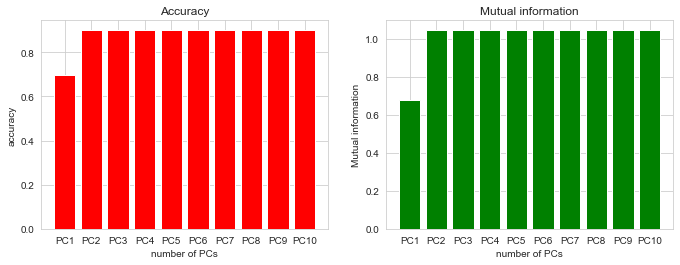

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)

ax[0].bar(eigen.pc.values, accuracy_list,    color='r')
ax[0].set_ylim(bottom=0)
ax[0].set(title='Accuracy', ylabel='accuracy', xlabel='number of PCs')

ax[1].bar(eigen.pc.values,mutual_info_list,  color='g')
ax[1].set_ylim(bottom=0)
ax[1].set(title='Mutual information', ylabel='Mutual information', xlabel='number of PCs')

plt.show()